In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/NEWeather/outlier_detection.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,method,precision,recall,f1
0,90,lof,0.685811,0.776079,0.728158
1,90,iforest,0.745649,0.912616,0.820727
2,90,hst,0.758697,0.559803,0.644249
3,90,lof,0.687774,0.755484,0.720041
4,90,iforest,0.760551,0.915998,0.831068
...,...,...,...,...,...
155,90,z,0.000000,0.000000,0.000000
156,80,z,0.000000,0.000000,0.000000
157,70,z,1.000000,0.000184,0.000369
158,60,z,1.000000,0.000138,0.000275


In [3]:
tabella = df.groupby(['method','percentage']).mean()
tabella['f1'] = tabella['f1'].round(4)
tabella['precision'] = tabella['precision'].round(4)
tabella['recall'] = tabella['recall'].round(4)
#tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['method','percentage'],ascending=False).to_csv("2_c.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['method'],columns='percentage',values='f1').reset_index()
tabella.to_csv("2_c_n.csv")

In [4]:
df_z = df[(df['method'] == 'z')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z

,percentage,precision,recall,f1
0,50,0.250,0.000028,0.000055
1,60,0.125,0.000017,0.000034
2,70,0.375,0.000068,0.000136
3,80,0.000,0.000000,0.000000
4,90,0.125,0.000067,0.000134


In [5]:
df_lof = df[(df['method'] == 'lof')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof

,percentage,precision,recall,f1
0,50,0.920520,0.523040,0.667039
1,60,0.892573,0.530774,0.665655
2,70,0.845896,0.519220,0.643437
3,80,0.773053,0.540727,0.636325
4,90,0.685660,0.780297,0.729861


In [6]:
df_if = df[(df['method'] == 'iforest')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if

,percentage,precision,recall,f1
0,50,1.000000,0.268947,0.423876
1,60,1.000000,0.332568,0.499112
2,70,1.000000,0.424337,0.595821
3,80,0.998361,0.609894,0.757181
4,90,0.741408,0.922392,0.821941


In [7]:
df_hst = df[(df['method'] == 'hst')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst

,percentage,precision,recall,f1
0,50,0.906576,0.721392,0.803437
1,60,0.936428,0.672794,0.782977
2,70,0.939325,0.621962,0.748326
3,80,0.889452,0.575994,0.699163
4,90,0.730322,0.547633,0.625432


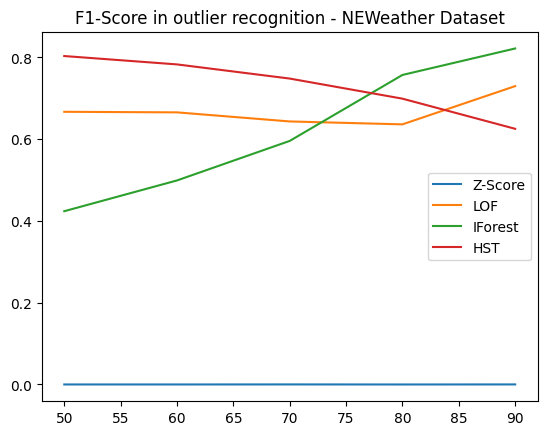

In [8]:
plt.plot(df_z['percentage'], df_z['f1'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['f1'], label='LOF')
plt.plot(df_if['percentage'], df_if['f1'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['f1'], label='HST')
plt.title("Recall in outlier recognition - NEWeather Dataset")
plt.legend()

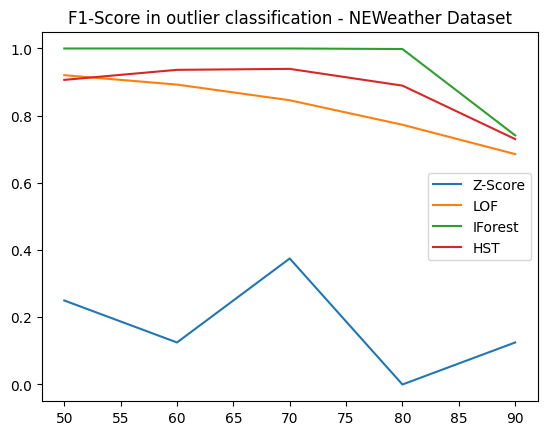

In [9]:
plt.plot(df_z['percentage'], df_z['precision'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['precision'], label='LOF')
plt.plot(df_if['percentage'], df_if['precision'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['precision'], label='HST')
plt.title("Precision in outlier classification - NEWeather Dataset")
plt.legend()

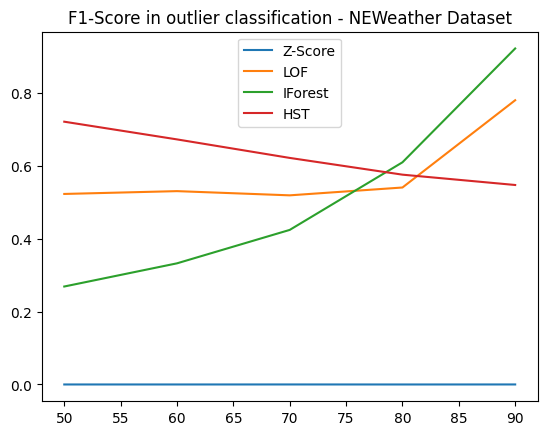

In [10]:
plt.plot(df_z['percentage'], df_z['recall'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['recall'], label='LOF')
plt.plot(df_if['percentage'], df_if['recall'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['recall'], label='HST')
plt.title("F1-Score in outlier classification - NEWeather Dataset")
plt.legend()